In [1]:
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import string as str
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st
import statsmodels.api as sm

%matplotlib inline


from datetime import datetime
from IPython.display import display


# MISSION 1: Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

In [2]:
# import des transactions
trans = pd.read_csv('transactions.csv', sep=',')
trans.sort_values(by='id_prod', ascending=False)
trans

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [3]:
trans.isnull().any()

id_prod       False
date          False
session_id    False
client_id     False
dtype: bool

In [4]:
# identification des valeurs tests des transactions
test_trans = trans[trans['id_prod'].str.contains('T', na = False)]
test_trans

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [5]:
# Suppression des valeurs test sur les transactions
trans = trans[trans.id_prod != 'T_0']
trans

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [6]:
# import des produits
product = pd.read_csv('products.csv', sep=',')
product.sort_values(by='id_prod', ascending=False)

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2
...,...,...,...
922,0_1000,6.84,0
663,0_100,20.60,0
2691,0_10,17.95,0
803,0_1,10.99,0


In [7]:
# Identification de l'outler
product[product['price']<0]


,id_prod,price,categ
731,T_0,-1.0,0


In [8]:
# suppression de la valeur aberrante
product = product[product.id_prod != 'T_0']
product

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [9]:
# import des clients
customer = pd.read_csv('customers.csv', sep=',')
customer.sort_values(by='client_id', ascending=False)
#customer.head(60)

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994
...,...,...,...
3426,c_1001,m,1982
8472,c_1000,f,1966
2137,c_100,m,1992
6894,c_10,m,1956


In [10]:
# Identification des valeurs irrégulières
customer[customer['client_id'].str.contains('t', na = False)]


,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [11]:
# suppression de la valeur aberrante
#index_condition = customer[ (customer['client_id'] == 'ct_0') & (customer['client_id'] == 'ct_1') ].index
#customer = customer.drop( index_condition, inplace=True)

customer = customer[(customer.client_id != 'ct_0') & (customer.client_id != 'ct_1')]
customer

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [12]:
# jointure entre trans, product et customer.
trans = trans.merge(product, how = 'left', on = 'id_prod').merge(customer, how = 'left', on = 'client_id')
    
trans 

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980
...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994


In [13]:
# Cherchons les possibles transactions sans informations
case_nulle = len(trans[trans.isnull().any(axis=1)])
print(f"Nombre de lignes avec des cases vides après nettoyage:{case_nulle}")

Nombre de lignes avec des cases vides après nettoyage:103


In [14]:
products_sans_info = trans[trans.isnull().any(axis=1)]['id_prod'].drop_duplicates().iloc[0]
print(f"le produit concerné est:{products_sans_info}")

le produit concerné est:0_2245


In [15]:
# Identification des données manquantes
trans_sans_info = trans[trans['id_prod']== '0_2245']
trans_sans_info

,id_prod,date,session_id,client_id,price,categ,sex,birth
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988
...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN,f,1979
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN,f,1983
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN,f,1984
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN,f,1973


In [16]:
# Suppression du produit 0_2245 
trans = trans[trans['id_prod']!= '0_2245']
trans

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980
...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994


In [17]:
trans['date'] = pd.to_datetime(trans['date'])

<ipython-input-17-3f1b4a8bb888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['date'] = pd.to_datetime(trans['date'])


In [18]:
trans['categ'] = trans['categ'].astype(int)

<ipython-input-18-d1c32c1c7eba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['categ'] = trans['categ'].astype(int)


In [19]:
trans = trans.fillna(0)

# age column
trans['age'] = (2022 - trans['birth'])

# year column
trans['year'] = trans['date'].apply(lambda x: x.year)

# month column
trans['month'] = trans['date'].apply(lambda x: x.month)

# month_year
# trans['month_year'] = trans['date'].apply(lambda x: int(str(x.month) + str(x.year).zfill(2)))


In [20]:
trans.sort_values(by=['categ'], ascending=False)

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year,month
296320,2_169,2021-08-03 11:27:50.814579,s_70831,c_2481,111.99,2,m,1992,30,2021,8
38430,2_110,2021-12-03 09:51:13.698182,s_128737,c_1751,62.25,2,f,2001,21,2021,12
219998,2_153,2021-03-06 14:42:34.694553,s_2609,c_7624,139.99,2,m,2001,21,2021,3
160213,2_7,2021-05-13 22:48:52.215917,s_34156,c_2212,69.99,2,m,2000,22,2021,5
99044,2_174,2021-07-05 09:02:57.514426,s_58138,c_6264,83.63,2,m,1998,24,2021,7
...,...,...,...,...,...,...,...,...,...,...,...
138349,0_1451,2021-08-08 13:17:57.309958,s_73001,c_6795,19.99,0,f,1965,57,2021,8
138350,0_1517,2021-09-24 07:56:16.943634,s_94662,c_2900,17.99,0,m,1979,43,2021,9
138352,0_1443,2021-04-28 19:34:06.220028,s_27108,c_5894,5.99,0,m,1975,47,2021,4
138353,0_1652,2021-09-02 20:34:02.407537,s_84185,c_8621,10.70,0,m,1988,34,2021,9


In [21]:
trans[['price','age']].describe()

,price,age
count,336713.000000,336713.000000
mean,17.215189,44.176432
std,17.855445,13.524433
min,0.620000,18.000000
25%,8.610000,35.000000
50%,13.900000,42.000000
75%,18.990000,51.000000
max,300.000000,93.000000


# Mission n° 2

Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.

# Vous devrez y utiliser au moins :

    des indicateurs de tendance centrale (mode, moyenne, mediane) et de dispersion ;
    une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;
    des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
    des analyses bivariées.
    ca par mois par année
    representer graphiquement les valeurs qualitatives
    évolution du ca au cs du tps
    pour chaque categ de produit
    dimunition du ca ?
    Lorenz
    proportion de clients qui permettraient de generer un % de ca
    

In [22]:
# indicateurs de tendance centrale ;
# on selectionne d'abord la colonne sur laquelle on voudrait travailler
trans['id_prod'].value_counts(normalize = True)
# normalize = True permet d'afficher la fréquence des valeurs de id_prod


1_369     0.003210
1_417     0.003154
1_498     0.003077
1_414     0.003050
1_425     0.003008
            ...   
0_1840    0.000003
2_93      0.000003
0_541     0.000003
0_1233    0.000003
2_28      0.000003
Name: id_prod, Length: 3264, dtype: float64

In [23]:
trans['price'].value_counts(normalize = True)


15.99     0.031371
4.99      0.027938
10.99     0.026578
3.99      0.025877
5.99      0.024576
            ...   
37.91     0.000003
2.48      0.000003
115.99    0.000003
34.52     0.000003
1.38      0.000003
Name: price, Length: 1442, dtype: float64

In [24]:
trans['categ'].value_counts(normalize = True)


0    0.621972
1    0.325901
2    0.052127
Name: categ, dtype: float64

In [25]:
trans['birth'].value_counts(normalize = True)


1980    0.070915
1979    0.036880
1988    0.036844
1978    0.036441
1986    0.035098
          ...   
1932    0.000472
1935    0.000425
1930    0.000342
1929    0.000255
1931    0.000249
Name: birth, Length: 76, dtype: float64

In [26]:
# Grouper les transactions par categorie et par mois
trans_mois = trans[["date","price","categ"]].groupby(["categ",pd.Grouper(key="date", freq="1M")]).sum().reset_index("categ")
trans_mois

,categ,price
date,,
2021-03-31,0,193566.38
2021-04-30,0,205159.67
2021-05-31,0,196114.96
2021-06-30,0,167886.34
2021-07-31,0,144711.92
2021-08-31,0,167677.82
2021-09-30,0,246264.21
2021-10-31,0,199217.94
2021-11-30,0,155843.78


In [27]:
trans_mois_categ = trans_mois.groupby(['categ']).sum().reset_index()
trans_mois_categ

,categ,price
0,0,2229722.65
1,1,2247384.41
2,2,1319470.71


Text(0, 0.5, 'prix totaux')

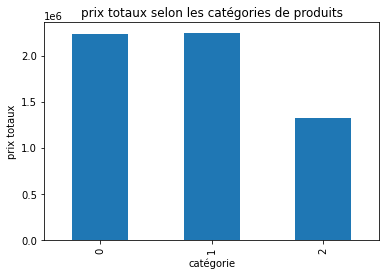

In [28]:
trans_mois_categ["price"].plot(kind='bar')
plt.title("prix totaux selon les catégories de produits")
plt.xlabel("catégorie")
plt.ylabel("prix totaux")

In [29]:
# Grouper les transactations totales par mois
trans_mois_total = trans_mois.reset_index()[["date", "price"]].groupby("date").sum().reset_index()
trans_mois_total['date'] = pd.to_datetime(trans_mois_total['date']).dt.date
trans_mois_total


,date,price
0,2021-03-31,479312.03
1,2021-04-30,472980.72
2,2021-05-31,489367.95
3,2021-06-30,481257.94
4,2021-07-31,480898.66
5,2021-08-31,479305.19
6,2021-09-30,502771.28
7,2021-10-31,319159.96
8,2021-11-30,512890.17
9,2021-12-31,522937.68


In [30]:
trans_mois_total.describe()

,price
count,12.000000
mean,483048.147500
std,55570.673098
min,319159.960000
25%,479310.320000
50%,485312.945000
75%,515402.047500
max,532740.880000


In [31]:
# les transactions par année
trans_annee = trans[["date", "price"]].groupby(pd.Grouper(key="date", freq="1Y")).sum().reset_index()
trans_annee

,date,price
0,2021-12-31,4.740882e+06
1,2022-12-31,1.055696e+06


Text(0.5, 1.0, 'Montant mensuel des transactions au cours des mois')

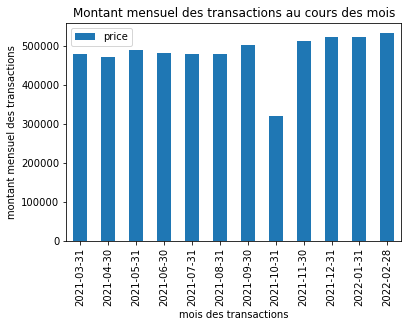

In [32]:
trans_mois_total.plot(x='date', y='price', kind='bar');
plt.xlabel("mois des transactions")
plt.ylabel("montant mensuel des transactions")
plt.title("Montant mensuel des transactions au cours des mois")

# a) des indicateurs de tendance centrale (mode, moyenne, mediane) et de dispersion ;

In [33]:
# Calcul du mode, de la moyenne et de la mediane
print("la moyenne est:",trans_mois_total['price'].mean())
print("la mediane est:",trans_mois_total['price'].median())
print("le mode est:\n",trans_mois_total['price'].mode())


la moyenne est: 483048.14749998186
la mediane est: 485312.94499998866
le mode est:
 0     319159.96
1     472980.72
2     479305.19
3     479312.03
4     480898.66
5     481257.94
6     489367.95
7     502771.28
8     512890.17
9     522937.68
10    522955.31
11    532740.88
dtype: float64


In [34]:
# indicateurs de dispersion (la variance et l'écart-type) ;
print("La variance:",trans_mois_total['price'].var())
print("L'ecart-type:",trans_mois_total['price'].std())


La variance: 3088099708.550305
L'ecart-type: 55570.67309786975


# b) une analyse de concentration, via une courbe de Lorenz et un indice de Gini 

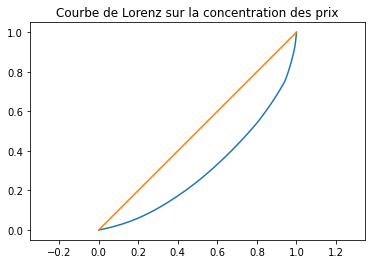

In [35]:
# une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;

dep = trans['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
# Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. 
# Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

xaxis = np.linspace((0-1/n),(1+1/n),(n+1)) 
# linespace(début, fin, nombre de valeurs)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot((0,1),(0,1))
plt.title("Courbe de Lorenz sur la concentration des prix")
plt.show()




In [36]:
# INDICE DE GINI
# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, 
# on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini
print(f"Indice de GINI:{gini}")

Indice de GINI:0.392145510890881


# c) des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;

In [37]:
trans_mois.index

DatetimeIndex(['2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28'],
              dtype='datetime64[ns]', name='date', freq=None)

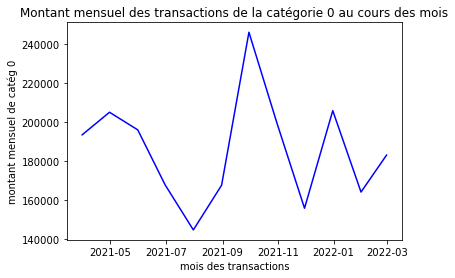

In [38]:
# Graphique sur l'évolution du Chiffre d'Affaire en fonction des mois 
fig, ax = plt.subplots()
ax.plot(trans_mois.loc[trans_mois["categ"]==0, 'price'], color='blue')
plt.xlabel("mois des transactions")
plt.ylabel("montant mensuel de catég 0")
plt.title("Montant mensuel des transactions de la catégorie 0 au cours des mois")
plt.show()

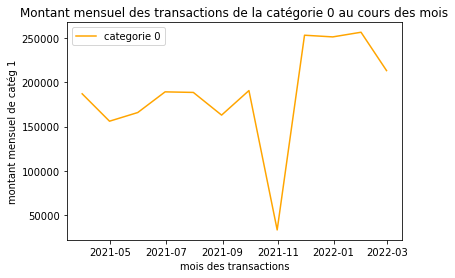

In [39]:
fig, ax = plt.subplots()
ax.plot(trans_mois.loc[trans_mois["categ"]==1, 'price'], color='orange')
plt.legend(["categorie 0","categorie 1","categorie 2"])
plt.xlabel("mois des transactions")
plt.ylabel("montant mensuel de catég 1")
plt.title("Montant mensuel des transactions de la catégorie 0 au cours des mois")
plt.show()

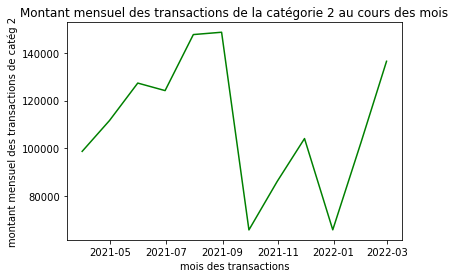

In [40]:
fig, ax = plt.subplots()
ax.plot(trans_mois.loc[trans_mois["categ"]==2, 'price'], color='green')
plt.xlabel("mois des transactions")
plt.ylabel("montant mensuel des transactions de catég 2")
plt.title("Montant mensuel des transactions de la catégorie 2 au cours des mois")
plt.show()

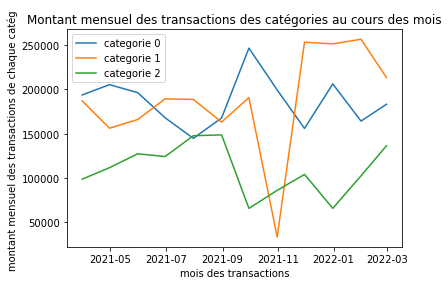

In [41]:
# Graphique sur l'évolution du Chiffre d'Affaire en fonction des mois des différentes catégories
fig, ax = plt.subplots()
ax.plot(trans_mois.loc[trans_mois["categ"]==0, 'price'])
ax.plot(trans_mois.loc[trans_mois["categ"]==1, 'price'])
ax.plot(trans_mois.loc[trans_mois["categ"]==2, 'price'])
plt.xlabel("mois des transactions")
plt.ylabel("montant mensuel des transactions de chaque catég ")
plt.title("Montant mensuel des transactions des catégories au cours des mois")
plt.legend(["categorie 0","categorie 1","categorie 2"])
plt.show()

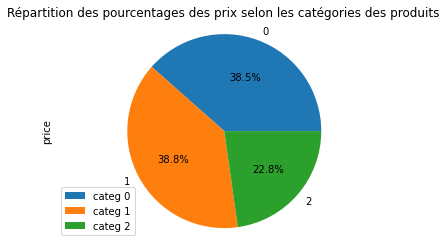

In [42]:
trans_mois_categ['price'].plot(kind='pie', autopct='%1.1f%%')
#(trans_mois.groupby(['categ']).sum().reset_index()).plot(kind='pie')
plt.legend(["categ 0","categ 1","categ 2"], loc='lower left')
plt.title("Répartition des pourcentages des prix selon les catégories des produits")
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique



Text(0, 0.5, 'prix totaux')

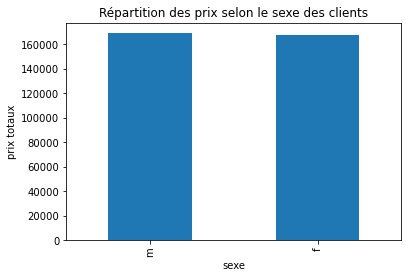

In [43]:
trans['sex'].value_counts().plot(kind='bar');
plt.title("Répartition des prix selon le sexe des clients")
plt.xlabel("sexe")
plt.ylabel("prix totaux")

<function matplotlib.pyplot.show(*args, **kw)>

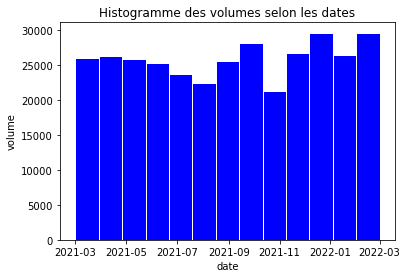

In [44]:

# We can set the number of bins with the `bins` kwarg
plt.hist(trans['date'], bins = 13, color = 'blue', edgecolor = 'white')
plt.title("Histogramme des volumes selon les dates")
plt.xlabel("date")
plt.ylabel("volume")
plt.show

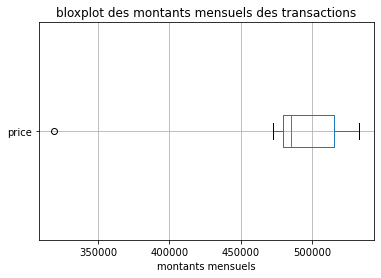

In [45]:
# Affiche boite à moustaches
trans_mois_total.boxplot(column="price", vert=False)
plt.title("bloxplot des montants mensuels des transactions")
plt.xlabel("montants mensuels")
plt.show()


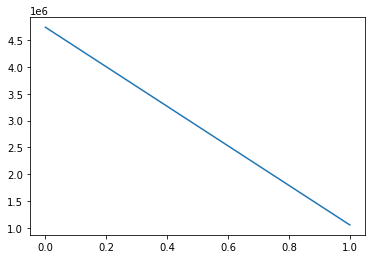

In [46]:
# Graphique sur l'évolution du Chiffre d'Affaire en fonction des années

fig, ax = plt.subplots()
ax.plot(trans_annee['price'])
plt.show()

In [47]:
# le prix moyen par catégorie
trans_categ = trans[['categ', 'price']].groupby(by=['categ']).mean()

trans_categ

,price
categ,
0,10.646828
1,20.480106
2,75.174949


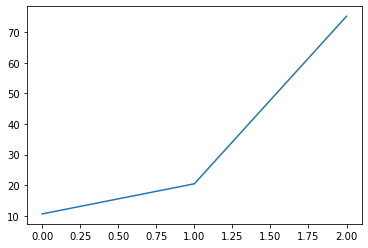

In [48]:
fig, ax = plt.subplots()
ax.plot(trans_categ)
plt.show()

# ANALYSE BIVARIEE

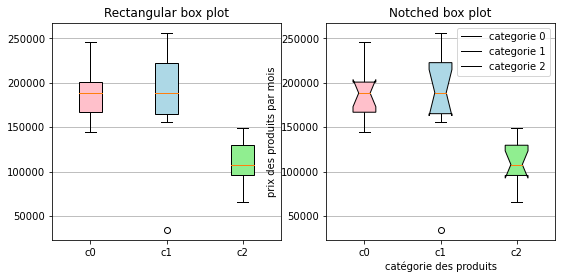

In [49]:

c0 = trans_mois.loc[trans_mois["categ"]==0, 'price']
c1 = trans_mois.loc[trans_mois["categ"]==1, 'price']
c2 = trans_mois.loc[trans_mois["categ"]==2, 'price']

data = [c0, c1, c2]
labels = ['c0', 'c1', 'c2']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    plt.xlabel("catégorie des produits")
    plt.ylabel("prix des produits par mois")

plt.legend(["categorie 0","categorie 1","categorie 2"])

plt.show()


Text(0, 0.5, 'prix des produits par mois')

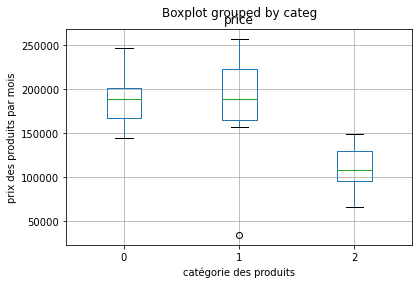

In [50]:
trans_mois.boxplot(by ='categ', column =['price'], grid = True)

plt.xlabel("catégorie des produits")
plt.ylabel("prix des produits par mois")
#plt.title("Boxplot des prix mensuels selon les catégories")

In [51]:
# Pour calculer le coefficient de Pearson et la covariance, 2 lignes suffisent !

import scipy.stats as st
import numpy as np

print(st.pearsonr(trans["price"],trans["categ"])[0])
print(np.cov(trans["price"],trans["categ"],ddof=0))

0.6733591340195406
[[318.81598278   7.10663129]
 [  7.10663129   0.34937673]]


In [52]:
print(np.cov(trans["price"],trans["categ"],ddof=0)[1,0])

7.106631287981154


# Mission n° 3

# Voici quelques questions supplémentaires, que votre manager vous a posées :


 # 1. Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [53]:
X = "sex"
Y = "categ"

cont_1 = trans[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

categ,0,1,2,Total
sex,,,,
f,103786,55469,8260,167515
m,105640,54266,9292,169198
Total,209426,109735,17552,336713


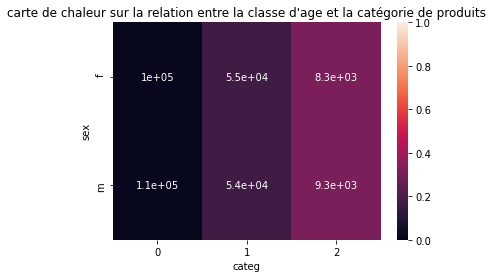

In [54]:
# couleur claire pour une forte relation
import seaborn as sns

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(trans)
indep = tx.dot(ty) / n

c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()

table_1 = measure/xi_n
sns.heatmap(table_1.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],vmin=0, vmax=1)
plt.title("carte de chaleur sur la relation entre la classe d'age et la catégorie de produits" )
plt.show()



In [55]:
print("khi-2:", xi_n)


khi-2: 81.86933350990711


# 2. Y a-t-il une corrélation entre l'âge des clients et :
        Le montant total des achats ;
        La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
        La taille du panier moyen (en nombre d’articles) ;
        Les catégories de produits achetés.


In [56]:
# Corrélation entre l'age et Le montant total des achats ;

In [57]:
trans

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,45,2021,4
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,2000,22,2022,2
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,1979,43,2021,9
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,1963,59,2021,10
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,1980,42,2021,7
...,...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1,m,1969,53,2021,5
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0,m,1991,31,2021,6
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0,f,1968,54,2021,3
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2,f,1994,28,2021,10


In [58]:
# transactions totale des clients selon l'id et l'age
trans_total_client = trans[['price', 'client_id', 'age']].groupby(['client_id', 'age']).sum().reset_index()
trans_total_client.sort_values(by = 'price', ascending = False).head(20)


,client_id,age,price
677,c_1609,42,162007.34
4388,c_4958,23,144257.21
6337,c_6714,54,73197.34
2724,c_3454,53,54442.92
7715,c_7959,48,2564.25
3870,c_4491,38,2540.53
7791,c_8026,44,2537.67
1268,c_2140,45,2527.01
8195,c_8392,44,2515.98
7120,c_7421,44,2511.98


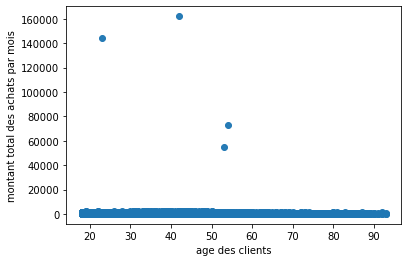

In [59]:
# Nuage de points avec des outliers: une donnée atypique est une valeur 
# ou une observation qui est « distante » des autres observations effectuées sur le même phénomène
plt.plot(trans_total_client["age"],trans_total_client["price"],'o',alpha=10)
plt.xlabel("age des clients")
plt.ylabel("montant total des achats par mois")
plt.show()

In [60]:
# Identification des outliers (valeurs atypiques)
trans_total_client[trans_total_client['client_id'].isin(['c_1609', 'c_4958','c_6714', 'c_3454'])]

,client_id,age,price
677,c_1609,42,162007.34
2724,c_3454,53,54442.92
4388,c_4958,23,144257.21
6337,c_6714,54,73197.34


In [61]:
# Suppression des outliers
trans_total_client= trans_total_client[-trans_total_client['client_id'].isin(['c_1609', 'c_4958','c_6714', 'c_3454'])]
trans_total_client

,client_id,age,price
0,c_1,67,300.65
1,c_10,66,586.18
2,c_100,30,222.87
3,c_1000,56,980.02
4,c_1001,40,1102.45
...,...,...,...
8595,c_995,67,119.08
8596,c_996,52,739.60
8597,c_997,28,572.89
8598,c_998,21,1527.69


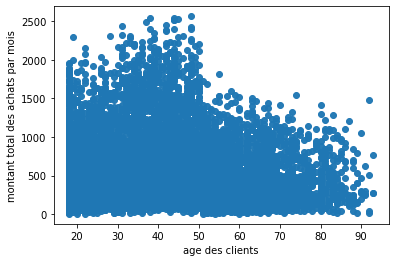

In [62]:
plt.plot(trans_total_client["age"],trans_total_client["price"],'o',alpha=10)
plt.xlabel("age des clients")
plt.ylabel("montant total des achats par mois")
plt.show()

In [63]:
print(st.pearsonr(trans_total_client["age"],trans_total_client["price"])[0])


-0.19042316059607653


# La corrélation entre l'age et la fréquence d’achat (ie. nombre d'achats par mois par exemple) ?

In [64]:
# Create a dataframe with the purchasing numbers by yearmonth by customer
trans_age_freq = trans[['client_id', 'age','session_id', 'month']].groupby(['client_id','age','month']).count().reset_index()
# trans_age_freq = trans_age_freq[trans_age_freq['year']!= 2022]
trans_age_freq = trans_age_freq[['age','session_id']].groupby(['age']).mean().reset_index()
trans_age_freq

,age,session_id
0,18,2.708441
1,19,2.651276
2,20,2.612221
3,21,2.684280
4,22,2.801546
...,...,...
71,89,3.075472
72,90,3.312500
73,91,2.800000
74,92,4.423077


Text(0.5, 1.0, "nuage de points entre l'age et la fréquence d'achats")

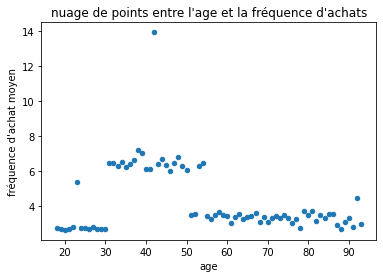

In [65]:
#trans_age_freq = trans_age_freq[['client_id', 'age','session_id']].mean()['session_id']
#plt.scatter_matrix(trans_age_freq)
trans_age_freq.plot.scatter(x='age', y='session_id')
plt.xlabel("age")
plt.ylabel("fréquence d'achat moyen")
plt.title("nuage de points entre l'age et la fréquence d'achats")


In [66]:
print(st.pearsonr(trans_age_freq["age"],trans_age_freq["session_id"])[0])
print(np.cov(trans_age_freq["age"],trans_age_freq["session_id"],ddof=0)[0,1])

-0.2923832985603256
-11.967506976086659


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002344903D820>,
      dtype=object)

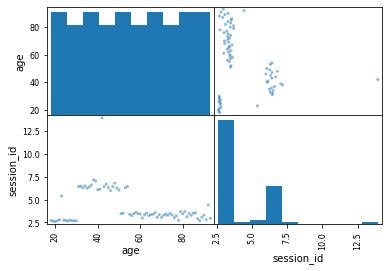

In [67]:
import pandas.plotting
from pandas.plotting import scatter_matrix

scatter_matrix(trans_age_freq)

# La corrélation entre l'age et La taille du panier moyen (en nombre d’articles);

In [68]:
trans_age_prod = trans[['session_id','id_prod', 'age']].groupby(['age', "session_id"]).count().reset_index()
#trans_age_prod.describe()
trans_age_prod_mean = trans_age_prod.groupby(['age']).mean().reset_index()
trans_age_prod_mean

,age,id_prod
0,18,1.757054
1,19,1.724901
2,20,1.742163
3,21,1.732310
4,22,1.842373
...,...,...
71,89,1.393162
72,90,1.543689
73,91,1.714286
74,92,1.597222


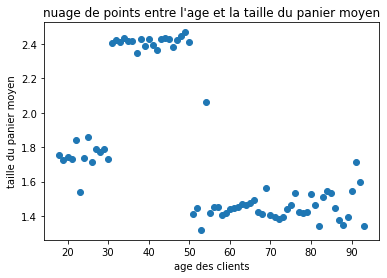

In [69]:

fig4, ax4 = plt.subplots()
ax4.scatter(trans_age_prod_mean['age'], trans_age_prod_mean['id_prod'])
plt.xlabel("age des clients")
plt.ylabel("taille du panier moyen")
plt.title("nuage de points entre l'age et la taille du panier moyen")

plt.show()

In [70]:
print(st.pearsonr(trans_age_prod_mean["age"],trans_age_prod_mean["id_prod"])[0])
print(np.cov(trans_age_prod_mean["age"],trans_age_prod_mean["id_prod"],ddof=0)[0,1])

-0.5807023962048712
-5.265830570218801


# La corrélation entre l'age des clients et la catégorie des produits achetés

In [71]:
def class_age(x):
    if x >= 0 and x <= 30:
        return '0-30'
    
    elif x > 30 and x <= 50:
        return '30-50'
    
    elif x > 50 :
        return '50 et +'
    
trans['class_age'] = trans['age'].apply(lambda x: class_age(x))
trans_class_categ = trans[['categ', 'class_age']]
trans_class_categ

,categ,class_age
0,0,30-50
1,2,0-30
2,1,30-50
3,0,50 et +
4,0,30-50
...,...,...
336811,1,50 et +
336812,0,30-50
336813,0,50 et +
336814,2,0-30


In [72]:
# Tableau de contingeance 
X = "class_age"
Y = "categ"

cont = trans[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
class_age,,,,
0-30,8349,14442,16136,38927
30-50,161179,47445,575,209199
50 et +,39898,47848,841,88587
Total,209426,109735,17552,336713


khi-2: 151969.7617882018


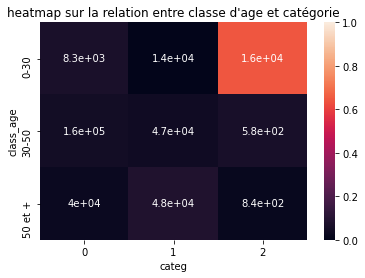

In [73]:

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(trans)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n2 = measure.sum().sum()
table = measure/xi_n2
plt.title("heatmap sur la relation entre classe d'age et catégorie")
print("khi-2:", xi_n2)
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],vmin=0, vmax=1)
plt.show()

In [74]:
trans_mois_total

,date,price
0,2021-03-31,479312.03
1,2021-04-30,472980.72
2,2021-05-31,489367.95
3,2021-06-30,481257.94
4,2021-07-31,480898.66
5,2021-08-31,479305.19
6,2021-09-30,502771.28
7,2021-10-31,319159.96
8,2021-11-30,512890.17
9,2021-12-31,522937.68
